<a href="https://colab.research.google.com/github/jruheni/Internship/blob/main/Student_Survey_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proof of Concept, How We Can Use Machince Learning Techniques To Imporve Service Provision
## Introduction

As global demand for quality education rises, many students from countries such as Kenya, Tanzania, and Pakistan are actively seeking opportunities to pursue higher education abroad, particularly in destinations like Canada, the United States, and the United Kingdom. However, navigating this journey is complex, with each student facing unique challenges related to academic readiness, financial capacity, logistical constraints, and program preferences.

At Nextwave Education Solutions, our mission is to help students from underrepresented regions access life-changing international education opportunities. To do this effectively at scale, we must go beyond traditional advising approaches and adopt data-driven methods that allow us to personalize guidance, target services efficiently, and match students to universities where they are most likely to thrive.

This study presents a proof of concept demonstrating how machine learning techniques, specifically clustering, can be used to identify and segment students based on key characteristics collected from consultation surveys. The dataset simulates responses from students in Kenya, Tanzania, and Pakistan and includes features such as GPA, preferred country of study, budget, standardized test results, career goals, and logistical preparedness (e.g., passport, visa, relatives abroad).

This proof of concept lays the foundation for embedding machine learning into our operational workflow, ensuring that Nextwave continues to lead in delivering smart, personalized education solutions for students across emerging markets.

### Step 1: Loading And Cleaning Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_survey.csv')
df = df.drop(columns=['Cluster'])


In [ ]:
df.head()

,GPA,Standardized_Test,Test_Score,Country_Preference,Open_to_Other_Country,Open_to_Small_University,Estimated_Budget,Needs_FinAid,Plans_to_Work,Program_Interest,...,Physics,Chemistry,Biology,Computer Science,Business,English,History,Geography,Social Studies,Law
0,3.75,1,1402,Canada,0,0,31578,0,0,Engineering,...,0,0,1,1,0,0,0,0,0,0
1,3.89,1,1460,US,1,0,34666,0,0,Engineering,...,0,1,0,0,0,0,0,0,0,0
2,3.62,1,1350,Canada,1,0,27528,0,0,Medicine,...,1,1,1,0,0,0,0,0,0,0
3,3.67,1,1541,Canada,1,0,28612,0,0,Engineering,...,1,1,0,1,0,0,0,0,0,0
4,3.78,1,1505,Canada,1,0,27585,0,0,Medicine,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Country_Preference', 'Program_Interest', 'Country_Residence'])

# Scale the entire DataFrame
scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded)


### Step 2: Using Elbow Method to Determine Number of Clusters

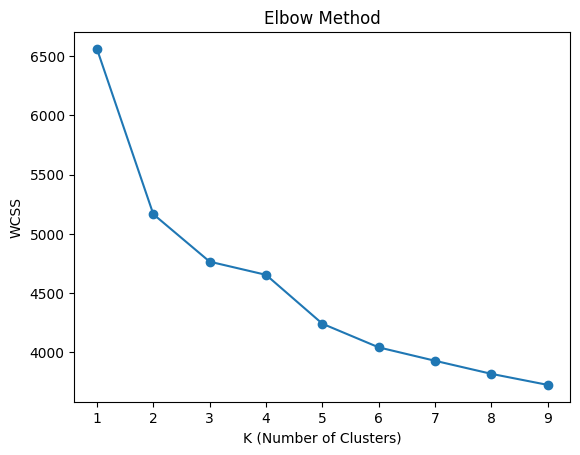

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('WCSS')
plt.show()


### Step 3: Generating Clusters

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

In [ ]:
# Mean values of each cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

              GPA  Standardized_Test   Test_Score  Open_to_Other_Country  \
Cluster                                                                    
0        3.209565           0.695652   747.304348               0.478261   
1        2.649688           0.000000     0.000000               0.562500   
2        3.641948           1.000000  1376.753247               0.519481   
3        3.092857           0.392857   415.607143               0.392857   

         Open_to_Small_University  Estimated_Budget  Needs_FinAid  \
Cluster                                                             
0                        0.565217      15376.869565      1.000000   
1                        0.500000      10171.343750      1.000000   
2                        0.220779      28084.376623      0.168831   
3                        0.607143      15054.464286      1.000000   

         Plans_to_Work  Program_Certainty  Foundation_Year  ...   Physics  \
Cluster                                            

### Step 4: Visualising Clusters

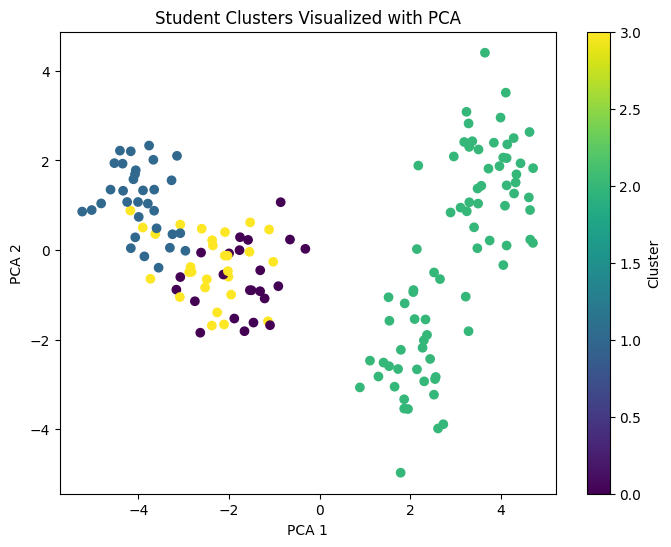

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Cluster'], cmap='viridis')
plt.title('Student Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


## Analysis
To uncover actionable insights for targeting and advising students, we applied unsupervised machine learning (clustering) to group students based on key features from the consultation survey. These included academic performance, financial capability, standardized test readiness, logistical preparedness, and study preferences.

The analysis revealed four distinct clusters, each representing a unique profile of student needs and opportunities. Here's a breakdown of each group:


---


**Cluster 0: High Achievers (Canada/US Bound)**

Profile Summary:

* GPA: 3.6-4.0
* Standardized Test Scores: High (1300-1600), most have taken SAT/ACT/IELTS
* Estimated Budget: $26,000-$40,000/year
* Program Certainty: Strong (4-5)
* Top Programs: Engineering, Computer Science, Medicine
* Logistics: Most have passports and relatives abroad
* Target Country: Canada or US, but open to others

Key Insights:

- This group is well-prepared academically and financially, making them ideal candidates for direct placement into top-tier institutions.
- They often plan for postgraduate studies and post-study work, indicating long-term educational goals.
- They've typically done their homework—many have already researched universities.

Nextwave Actionables:

Content Strategy: Use targeted email campaigns and webinars about Ivy League, top Canadian universities, co-op programs, and career pathways in STEM and Medicine.

Messaging Tone: Use confident, prestige-driven messaging (e.g., "Your Future at the World’s Best Universities Starts Here.")

Channels: LinkedIn, premium education platforms, and academic clubs.

Lead Magnets: Offer downloadable guides to top-ranked programs, postgrad work visa benefits, and scholarship opportunities at elite schools.



---


**Cluster 1: Budget-Conscious Realists**

Profile Summary:

* GPA: 2.8-3.5
* Test Scores: Moderate (900-1200); not all have taken tests
* Estimated Budget: $10,000-$20,000/year
* Needs Financial Aid
* Top Programs: Business, Education, Social Sciences
* Country Preference: UK or Canada
* Logistics: Limited research, fewer passports, fewer relatives abroad

Key Insights:

- This group is motivated but constrained by cost, making them ideal for targeting scholarship options, foundation programs, or lower-cost universities.
- They are more open to small or less competitive institutions, which expands placement flexibility.
- Program certainty is moderate, indicating potential for exploratory advising.

Nextwave Actionables:

Content Strategy: Highlight affordable universities, scholarships, tuition comparisons, and post-study employment ROI.

Messaging Tone: Reassuring and solution-oriented (e.g., "World-Class Education Doesn’t Have to Break the Bank.")

Channels: Facebook, Instagram, community youth programs, local radio.

Lead Magnets: Scholarship finder tools, cost breakdown calculators, webinars on foundation pathways and how to study abroad with limited finances.


---

**Cluster 2: Unprepared but Ambitious**

Profile Summary:

* GPA: 2.3-3.0
* No standardized test scores
* Estimated Budget: <$12,000/year
* High need for financial aid
* Top Programs: Business, Social Sciences
* Country of Residence: Mostly Pakistan and Tanzania
* Logistics: Few have passports or done university research

Key Insights:
- This group is highly aspirational but lacks readiness, both academically and logistically.

- Many plan to work during their studies, which points to financial pressure.

- Their lack of preparation makes them vulnerable to dropout risk or misaligned placements.

Nextwave Actionables:

Content Strategy: Focus on simplified "Study Abroad 101" content—explainer videos, testimonial success stories, beginner's guides.

Messaging Tone: Supportive and inspiring (e.g., "From Dreaming to Departing: Your Study Abroad Journey Starts Here.")

Channels: TikTok, YouTube Shorts, WhatsApp groups, school visits, NGO partners.

Lead Magnets: Free study abroad checklist, quiz-style readiness assessments, and info packs on foundation programs and passport/visa support.


---

**Cluster 3: Well-Connected & Decisive**

Profile Summary:

* GPA: 3.2-3.7
* Test Scores: Moderate to high (1200-1400)
* Estimated Budget: $18,000-$28,000
* Program Certainty: Strong (Law, Medicine, STEM)
* Logistics: Most have passports and relatives abroad
* Country Preference: Mostly US

Key Insights:

* These students have clear academic and career goals, and are often logistically advantaged.
* They are open to working and pursuing graduate school, making them strong long-term prospects.
* Many already researched universities, indicating high self-efficacy and engagement.

Nextwave Actionables:

Content Strategy: Promote Nextwave as a “matchmaking expert” that helps them make the smartest choice based on career goals.

Messaging Tone: Strategic and efficiency-focused (e.g., "Already Know What You Want? Let’s Get You There—Faster.")

Channels: Email nurture campaigns, alumni events, referral incentives, peer networks.

Lead Magnets: Personalized program-match tools, “Top 10 Universities for [Program]” lists, postgrad career roadmap downloads.

